<h1 style="text-align: center;"> Data Research & Economics</h1>

<p style="text-align: right;">João Victor Vieira Passon</p>

Jupyter Notebook para a visualização e resposta da Questão 1 do Case de Mercado de Combustíveis.

### Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.patches as mpatches

pd.set_option('display.max_rows', None)

### Tratamento dos Dados

In [2]:
directory = "dados_desafiodatascientistintern_vendas_distribuidoras_anp.xlsx"

def clean_data(directory, sheet_name):
    df = pd.read_excel(directory, sheet_name=sheet_name)
    df = df.melt(id_vars=['regiao', 'meses'], var_name='year', value_name='quantity')
    df['data'] = pd.to_datetime(df['year'].map(str) + "-" + df['meses'].map(str))
    df['product'] = sheet_name
    
    return df

combustiveis = pd.DataFrame()

for i in ['diesel', 'gasolina', 'etanol']:
    h = clean_data(directory=directory,
                   sheet_name=i)
    combustiveis = pd.concat([combustiveis, h], axis=0)
    
combustiveis.set_index('data', inplace=True)

In [3]:
combustiveis.head()

regiao  meses  year   quantity product
data                                             
2000-01-01     df      1  2000  23310.896  diesel
2000-02-01     df      2  2000  25967.743  diesel
2000-03-01     df      3  2000  24590.674  diesel
2000-04-01     df      4  2000  24975.963  diesel
2000-05-01     df      5  2000  27224.597  diesel

In [4]:
combustiveis.dtypes

regiao       object
meses         int64
year         object
quantity    float64
product      object
dtype: object

In [5]:
combustiveis.year = pd.to_numeric(combustiveis.year)

In [6]:
combustiveis.dtypes

regiao       object
meses         int64
year          int64
quantity    float64
product      object
dtype: object

In [7]:
combustiveis.isna().sum()

regiao      0
meses       0
year        0
quantity    0
product     0
dtype: int64

### Visualização dos Dados

#### Agregado para o Brasil:

Com base nas interpretações dos dados obtidos com a série podemos extrai que:

* A série dos combustíveis (Gasolina + Etanol + Diesel) é não estacionária e com tendência positiva;

* No país, historicamente, o consumo de diesel se concentrou próximo a 55%, chegando quase aos 60% do total entre 2000-2005. Após esse período verifica-se uma diminuição de sua parte chegando ao menor valor da série: 48% em 2019;

* A queda desse consumo não foi resultado de uma maior participação do consumo de gasolina, que se manteve ao longo da série próxima de 35%, mas ao ganho proporcional do consumo de Etanol. Esse ganho pode ser verificado pelo crescimento de 7% do total em 2000 para 15% em 2020, mais que dobrando sua porção. É importante ressaltar que o consumo da Gasolina também variou conforme alterações no consumo do Etanol;

* A partir dos levantamentos da própria [Agencia Nacional do Petróleo (ANP)](https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/precos-revenda-e-de-distribuicao-combustiveis/serie-historica-do-levantamento-de-precos), o preço médio de distribuição para Gasolina, Etanol e Óleo Diesel em agosto de 2020 atingiram os valores respectivos: 3,78/l, 2,40/l e 3,05/l. Assim, considerando que 1m³=1000l, chegamos a mais de 135 bilhões de reais para o mercado de Gasolina, 46 bilhões de reais para o mercado de Etanol e 175 bilhões de reais para o mercado de Diesel. Com isso, totaliza mais de R$ 356 bilhões para todos eles.


Quanto a sazonalidade do consumo de cada tipo de combustível:

* A Gasolina parece apresentar sazonalidade com picos de consumos no último mês do ano e queda nos dois primeiros meses do ano seguinte; 

* Para o Etanol, mesmo com ligeiro crescimento, a mesma situação é observada;

* Já para o Diesel, observamos uma sazonalidade diferente das anteriores. Ele tende a apresenta queda a partir décimo mês do ano, queda que se estendendo até o primeiro mês do ano seguinte. Somente a partir do segundo mês observa-se um aumento de seu consumo.


Uma observação interessante a partir da visualização da série é que em períodos de alto consumo de Gasolina o consumo de Etanol tendeu ter seu crescimento de consumo modesto - quando não estagnou. Ele só obteve picos quando o consumo da Gasolina teve queda sendo características de bens substitutos.

In [8]:
comb_agrup = combustiveis.groupby(by=["regiao", 'year']).sum().sort_index(level=["regiao", 'year']).drop('meses', axis=1)
comb_agrup['variacao_ano'] = ((comb_agrup.groupby(by=['regiao']).diff().quantity / comb_agrup.quantity).fillna(0)).round(3) * 100
print("Tabela Combustível Geral: Gasolina + Diesel + Etanol")
comb_agrup.filter(like="br", axis=0).style.format({'variacao_ano': '{:.2f} %'}).background_gradient(cmap='Greens', subset=['variacao_ano'])

Tabela Combustível Geral: Gasolina + Diesel + Etanol


In [9]:
discr_comb = combustiveis.groupby(by=['regiao', 'year', 'product']).sum().drop('meses', axis=1)
discr_comb['part_anual'] = combustiveis.groupby(by=['regiao', 'year', 'product'])['quantity'].sum() / combustiveis.groupby(by=['regiao', 'year', 'product'])['quantity'].sum().groupby(level=[0, 1]).transform("sum")
print("Discriminação por Tipo:")
discr_comb.filter(like='br', axis=0)

Discriminação por Tipo:


quantity  part_anual
regiao year product                           
br     2000 diesel    3.515126e+07    0.563457
            etanol    4.603588e+06    0.073793
            gasolina  2.263019e+07    0.362750
       2001 diesel    3.702490e+07    0.590152
            etanol    3.501993e+06    0.055819
            gasolina  2.221100e+07    0.354028
       2002 diesel    3.766835e+07    0.587920
            etanol    3.791880e+06    0.059183
            gasolina  2.261026e+07    0.352897
       2003 diesel    3.685325e+07    0.595471
            etanol    3.245322e+06    0.052438
            gasolina  2.179065e+07    0.352091
       2004 diesel    3.922567e+07    0.586224
            etanol    4.512926e+06    0.067445
            gasolina  2.317388e+07    0.346331
       2005 diesel    3.916715e+07    0.581220
            etanol    4.667223e+06    0.069259
            gasolina  2.355349e+07    0.349521
       2006 diesel    3.900840e+07    0.563684
            etanol    6.186553e+06    0.089398
            gasolina  2.400763e+07    0.346918
       2007 diesel    4.155818e+07    0.552265
            etanol    9.366836e+06    0.124475
            gasolina  2.432545e+07    0.323260
       2008 diesel    4.476395e+07    0.537842
            etanol    1.329010e+07    0.159681
            gasolina  2.517478e+07    0.302477
       2009 diesel    4.429846e+07    0.514031
            etanol    1.647095e+07    0.191126
            gasolina  2.540909e+07    0.294843
       2010 diesel    4.923904e+07    0.522946
            etanol    1.507430e+07    0.160097
            gasolina  2.984366e+07    0.316956
       2011 diesel    5.226391e+07    0.529768
            etanol    1.089922e+07    0.110479
            gasolina  3.549126e+07    0.359753
       2012 diesel    5.590036e+07    0.530121
            etanol    9.850180e+06    0.093412
            gasolina  3.969771e+07    0.376466
       2013 diesel    5.857250e+07    0.524121
            etanol    1.175496e+07    0.105186
            gasolina  4.142624e+07    0.370692
       2014 diesel    6.003162e+07    0.511386
            etanol    1.299412e+07    0.110692
            gasolina  4.436425e+07    0.377922
       2015 diesel    5.721087e+07    0.492302
            etanol    1.786274e+07    0.153710
            gasolina  4.113740e+07    0.353989
       2016 diesel    5.427857e+07    0.485135
            etanol    1.458584e+07    0.130366
            gasolina  4.301908e+07    0.384499
       2017 diesel    5.477229e+07    0.486590
            etanol    1.364177e+07    0.121192
            gasolina  4.414953e+07    0.392219
       2018 diesel    5.562947e+07    0.490707
            etanol    1.938472e+07    0.170992
            gasolina  3.835178e+07    0.338301
       2019 diesel    5.729845e+07    0.485549
            etanol    2.254405e+07    0.191039
            gasolina  3.816504e+07    0.323412
       2020 diesel    5.747206e+07    0.510619
            etanol    1.925793e+07    0.171100
            gasolina  3.582361e+07    0.318280

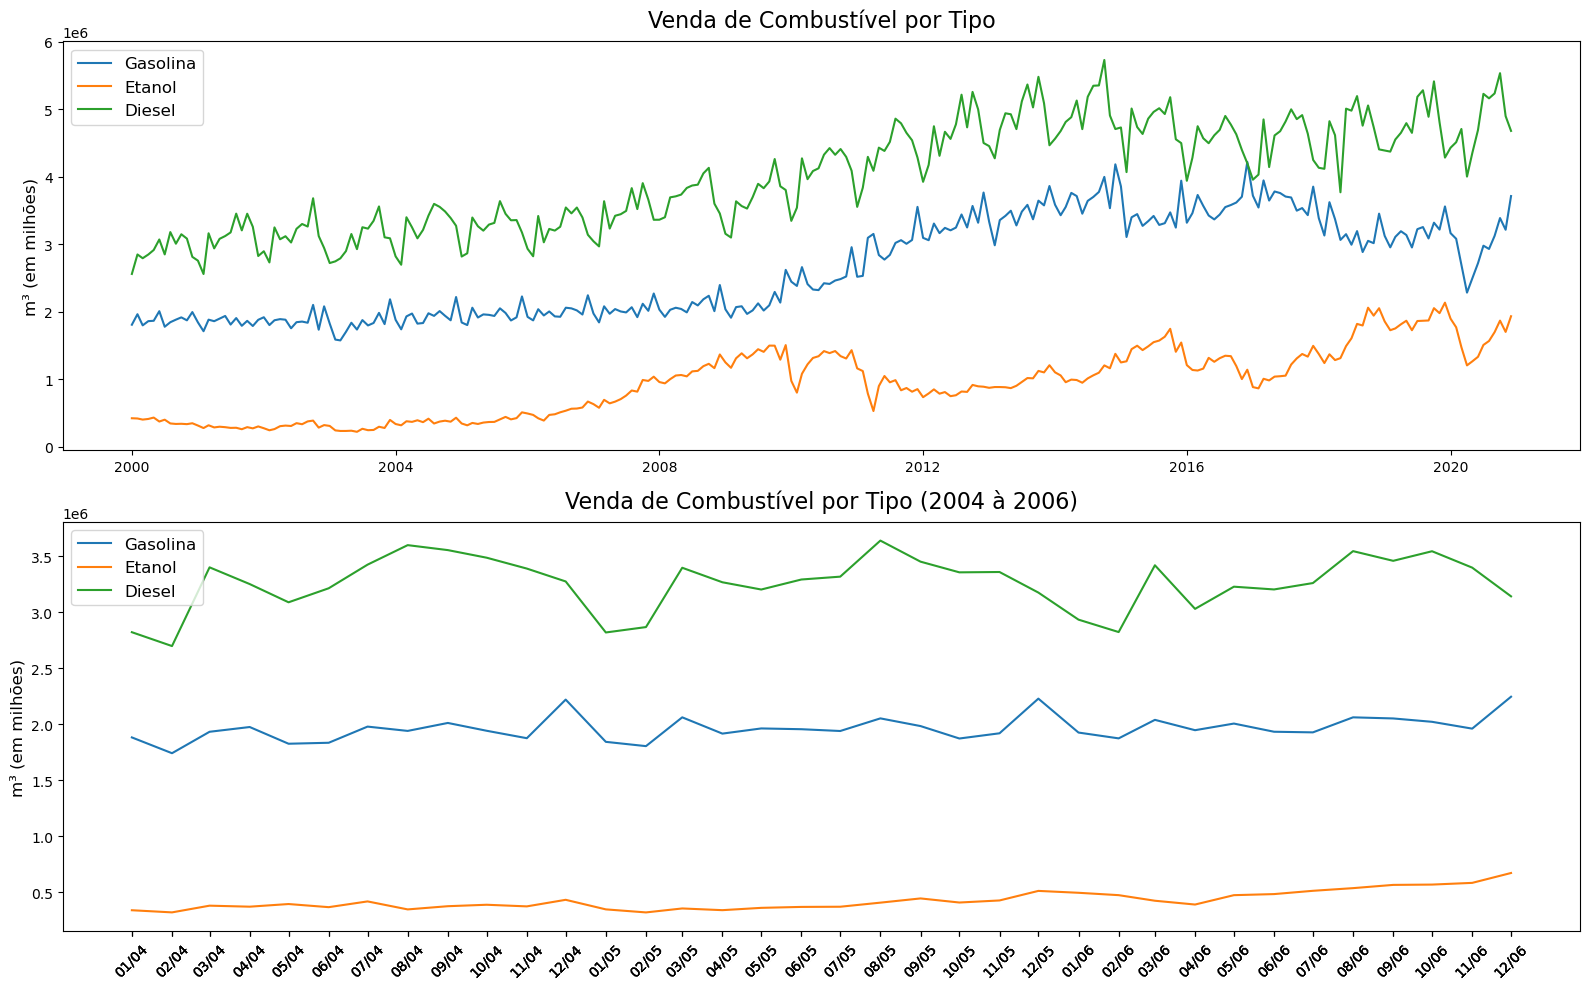

In [10]:
brasil = combustiveis[combustiveis['regiao'] == 'br']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

ax1.plot(brasil[brasil['product'] == 'gasolina'].quantity)
ax1.plot(brasil[brasil['product'] == 'etanol'].quantity)
ax1.plot(brasil[brasil['product'] == 'diesel'].quantity)
ax1.set_title("Venda de Combustível por Tipo", fontsize=16, pad=10)
ax1.set_ylabel("m³ (em milhões)", fontsize=12)
ax1.legend(['Gasolina', 'Etanol', 'Diesel'], fontsize=12)

ax2.plot(brasil[brasil['product'] == 'gasolina'].quantity.loc["2004-01-01":"2006-12-01"])
ax2.plot(brasil[brasil['product'] == 'etanol'].quantity.loc["2004-01-01":"2006-12-01"])
ax2.plot(brasil[brasil['product'] == 'diesel'].quantity.loc["2004-01-01":"2006-12-01"])
ax2.set_title("Venda de Combustível por Tipo (2004 à 2006)", fontsize=16, pad=10)
ax2.set_ylabel("m³ (em milhões)", fontsize=12)
ax2.legend(['Gasolina', 'Etanol', 'Diesel'], fontsize=12)
ax2.set_xticks(brasil.loc["2004-01-01":"2006-12-01"].index)
ax2.xaxis.set_major_formatter(mdate.DateFormatter("%m/%y"))
ax2.xaxis.set_tick_params(rotation=45)

plt.tight_layout();

In [11]:
fig = px.line(brasil, y="quantity", x="meses", color="year", facet_row="product", height=800, template="simple_white")

fig.update_xaxes(title="Mês do Ano", dtick=1)
fig.update_yaxes(title="m³ (em milhões)")
fig.update_layout(title={
        'text': "Variação no Ano",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
    
fig.show()

### Dados Estaduais:

#### Discriminado:

Com base nas interpretações dos dados obtidos com a série podemos extrai que:

* A distribuição do consumo entre as unidades da federação não é a mesma;

* Estados como Goiás, Mato Grosso e São Paulo apresentam uma maior participação do consumo de Etanol do que Gasolina. Enquanto Distrito Federal, Maranhão e Pará apresentam o contrário;

* Dentro das próprias regiões podemos verificar diferenças, por exemplo, o consumo para os três tipos de combustíveis parece ficar próximo em São Paulo, no entanto, para Minas Gerais, existe um equilíbrio entre o consumo de Gasolina e Etanol, mas uma maior participação consistente em relação ao Diesel;

* Outro exemplo é Goiás e Distrito Federal, enquanto o consumo de Diesel de Goiás tende a ficar próximo de 50%, o consumo do mesmo item no Distrito Federal não atinge 25%;

* Em relação ao crescimento de mercado a mesma coisa pode ser observada. Se pegarmos as movimentações de 2019 para 2020 vemos que Distrito Federal, Minas Gerais e São Paulo caíram em relação ao ano anterior. Por outro lado, Tocantins, Pará, Mato Grosso e Maranhão tiveram crescimento nesse período. Porém, esse crescimento não foi suficiente para evitar a queda nacional, isso evidencia o tamanho do mercado de Minas Gerais e São Paulo e em como afetam nacionalmente;

* Ao pegarmos o período de 5 anos, de 2016 à 2020, e observarmos nacionalmente concluímos que o mercado teve um leve crescimento, com período de expansão e contração entre esses anos. No entanto, ao visualizarmos essas alterações para os estados, vemos um crescimento para quem faz parte das regiões Norte, Nordeste e Centro-Oeste, exceto Distrito Federal. Enquanto estados como São Paulo vinha crescendo, mas, no ano da Pandemia, obteve uma queda para valores menores do que os observados em 2016.


Quanto a sazonalidade do consumo de cada tipo de combustível:

* Entre os estados da mesma região parecem possuir certa semelhança nos padrões;

* Os estados aparentam seguir os mesmos padrões de sazonalidades observadas para o Brasil, com a Gasolina e o Etanol apresentando expressivo crescimento no último mês do ano e queda até o segundo mês do ano subsequente;

* O Diesel segue a mesma linha apresentando queda a partir décimo mês do ano e isso se extende até o primeiro mês do ano seguinte. Somente a partir do segundo mês observa-se um aumento de seu consumo.

In [12]:
comb_agrup[comb_agrup.index.isin([2020, 2019, 2018, 2017, 2016], level=1)].style.format({'variacao_ano': '{:.2f} %'}).background_gradient(cmap='Greens', subset=['variacao_ano'])

In [13]:
discr_comb[discr_comb.index.isin([2020, 2019, 2018], level=1)]

quantity  part_anual
regiao year product                           
br     2018 diesel    5.562947e+07    0.490707
            etanol    1.938472e+07    0.170992
            gasolina  3.835178e+07    0.338301
       2019 diesel    5.729845e+07    0.485549
            etanol    2.254405e+07    0.191039
            gasolina  3.816504e+07    0.323412
       2020 diesel    5.747206e+07    0.510619
            etanol    1.925793e+07    0.171100
            gasolina  3.582361e+07    0.318280
df     2018 diesel    3.663959e+05    0.225500
            etanol    1.676294e+05    0.103168
            gasolina  1.090791e+06    0.671332
       2019 diesel    3.757483e+05    0.224099
            etanol    1.778438e+05    0.106067
            gasolina  1.123114e+06    0.669834
       2020 diesel    3.506858e+05    0.242340
            etanol    1.497711e+05    0.103499
            gasolina  9.466254e+05    0.654161
go     2018 diesel    2.685955e+06    0.495053
            etanol    1.516565e+06    0.279521
            gasolina  1.223071e+06    0.225426
       2019 diesel    2.781342e+06    0.490074
            etanol    1.752876e+06    0.308858
            gasolina  1.141131e+06    0.201068
       2020 diesel    2.958581e+06    0.523837
            etanol    1.557749e+06    0.275810
            gasolina  1.131573e+06    0.200353
ma     2018 diesel    1.394893e+06    0.587187
            etanol    3.729922e+04    0.015701
            gasolina  9.433583e+05    0.397111
       2019 diesel    1.376987e+06    0.580183
            etanol    4.700209e+04    0.019804
            gasolina  9.493781e+05    0.400013
       2020 diesel    1.436736e+06    0.597999
            etanol    3.918108e+04    0.016308
            gasolina  9.266547e+05    0.385693
mg     2018 diesel    6.797427e+06    0.528635
            etanol    2.488315e+06    0.193516
            gasolina  3.572715e+06    0.277849
       2019 diesel    6.936059e+06    0.516551
            etanol    3.190915e+06    0.237638
            gasolina  3.300672e+06    0.245812
       2020 diesel    6.991245e+06    0.538850
            etanol    2.743684e+06    0.211469
            gasolina  3.239443e+06    0.249680
mt     2018 diesel    2.839967e+06    0.675789
            etanol    8.406228e+05    0.200032
            gasolina  5.218573e+05    0.124179
       2019 diesel    2.936405e+06    0.665582
            etanol    1.000071e+06    0.226682
            gasolina  4.753091e+05    0.107736
       2020 diesel    3.173373e+06    0.691247
            etanol    9.156114e+05    0.199445
            gasolina  5.018128e+05    0.109308
pa     2018 diesel    2.298643e+06    0.658856
            etanol    5.364742e+04    0.015377
            gasolina  1.136548e+06    0.325767
       2019 diesel    2.432123e+06    0.663234
            etanol    5.837772e+04    0.015919
            gasolina  1.176566e+06    0.320847
       2020 diesel    2.617836e+06    0.676322
            etanol    4.408535e+04    0.011390
            gasolina  1.208775e+06    0.312289
sp     2018 diesel    1.211271e+07    0.397201
            etanol    9.956761e+06    0.326503
            gasolina  8.425692e+06    0.276296
       2019 diesel    1.244118e+07    0.388027
            etanol    1.167378e+07    0.364093
            gasolina  7.947691e+06    0.247880
       2020 diesel    1.211197e+07    0.411572
            etanol    1.013969e+07    0.344552
            gasolina  7.176931e+06    0.243876
to     2018 diesel    9.657228e+05    0.715977
            etanol    3.412171e+04    0.025297
            gasolina  3.489740e+05    0.258726
       2019 diesel    1.026947e+06    0.720379
            etanol    3.321540e+04    0.023300
            gasolina  3.654022e+05    0.256321
       2020 diesel    1.128563e+06    0.742585
            etanol    3.822692e+04    0.025153
            gasolina  3.529861e+05    0.232262

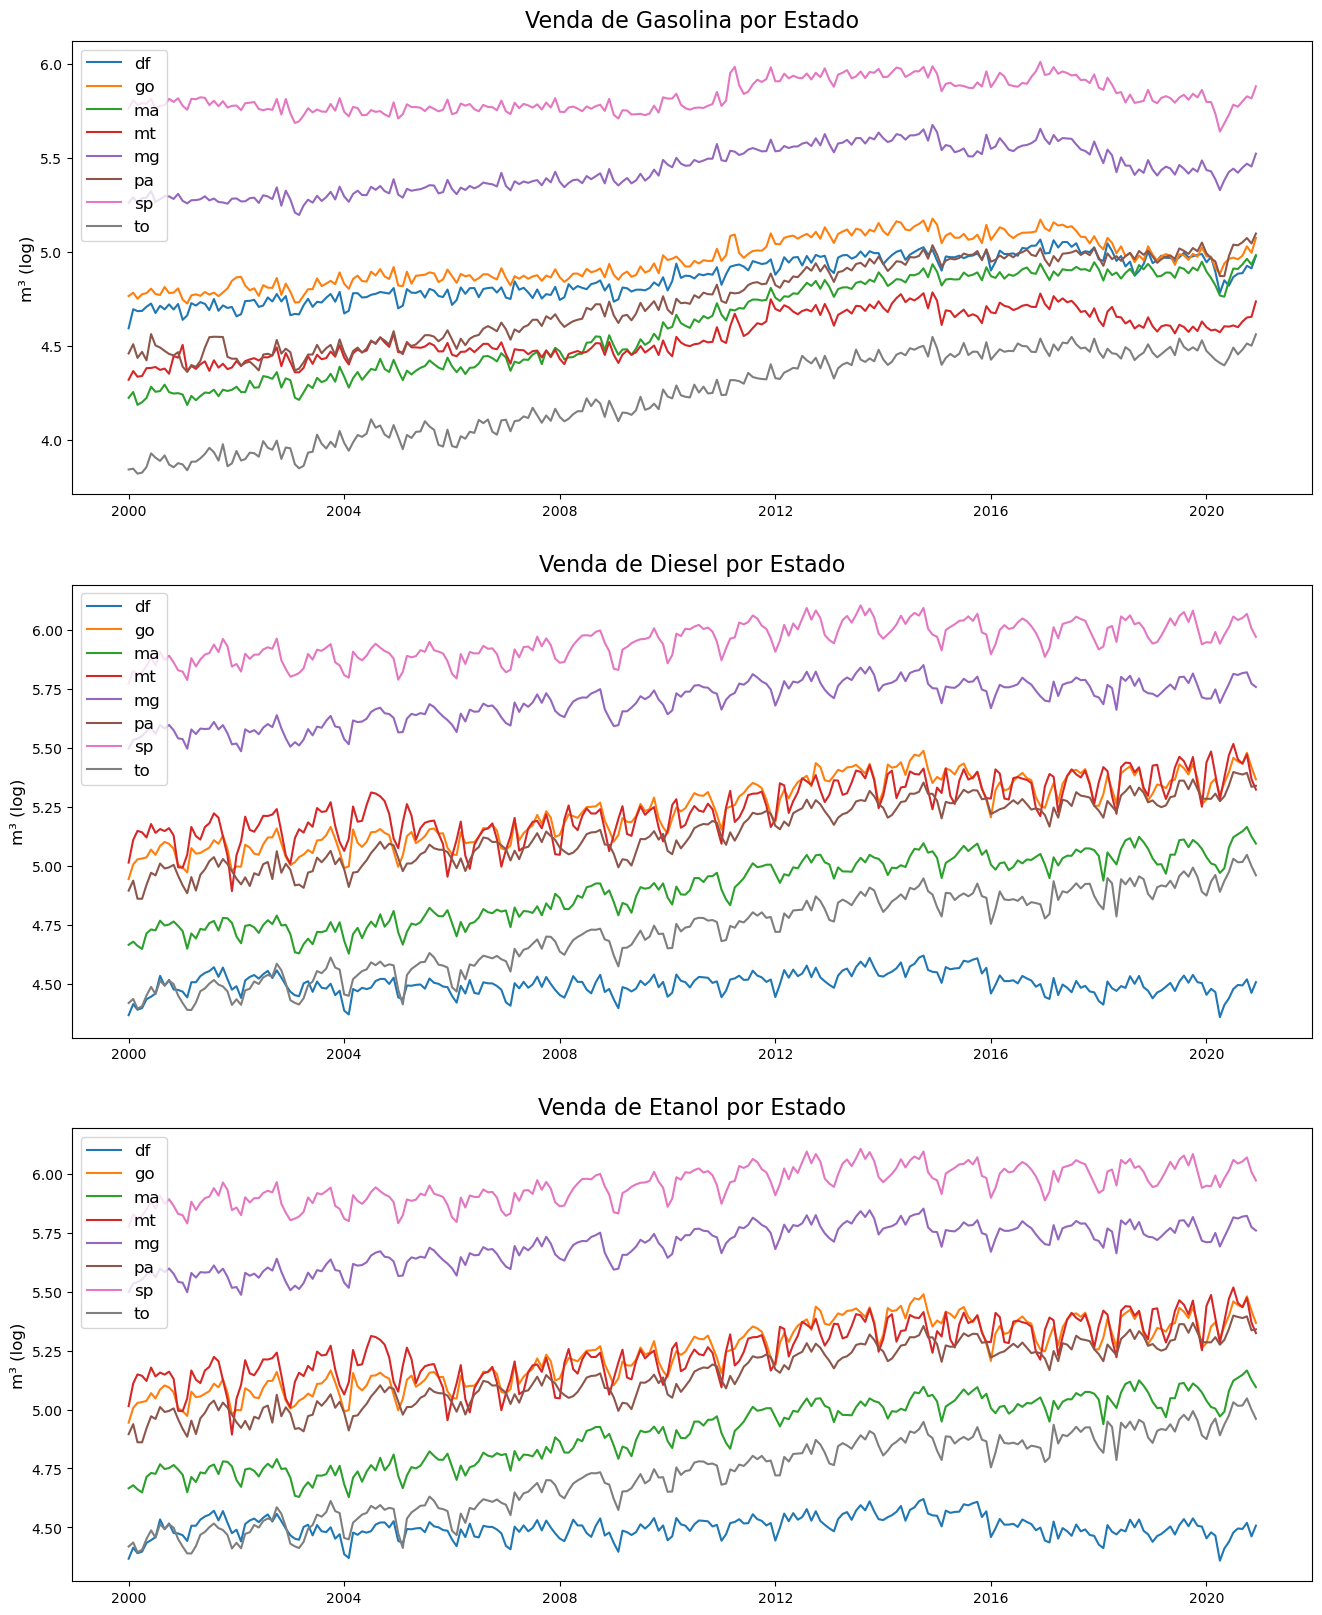

In [14]:
estados = pd.Series(combustiveis.regiao.unique()).drop(8).to_list()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16,20))

for i in estados:
    ax1.plot(np.log10(combustiveis[(combustiveis["regiao"] == i) & (combustiveis["product"] == 'gasolina')].quantity))
ax1.set_title("Venda de Gasolina por Estado", fontsize=16, pad=10)
ax1.set_ylabel("m³ (log)", fontsize=12)
ax1.legend(estados, fontsize=12)

for i in estados:
    ax2.plot(np.log10(combustiveis[(combustiveis["regiao"] == i) & (combustiveis["product"] == 'diesel')].quantity))
ax2.set_title("Venda de Diesel por Estado", fontsize=16, pad=10)
ax2.set_ylabel("m³ (log)", fontsize=12)
ax2.legend(estados, fontsize=12)

for i in estados:
    ax3.plot(np.log10(combustiveis[(combustiveis["regiao"] == i) & (combustiveis["product"] == 'diesel')].quantity))
ax3.set_title("Venda de Etanol por Estado", fontsize=16, pad=10)
ax3.set_ylabel("m³ (log)", fontsize=12)
ax3.legend(estados, fontsize=12)

plt.tight_layout;

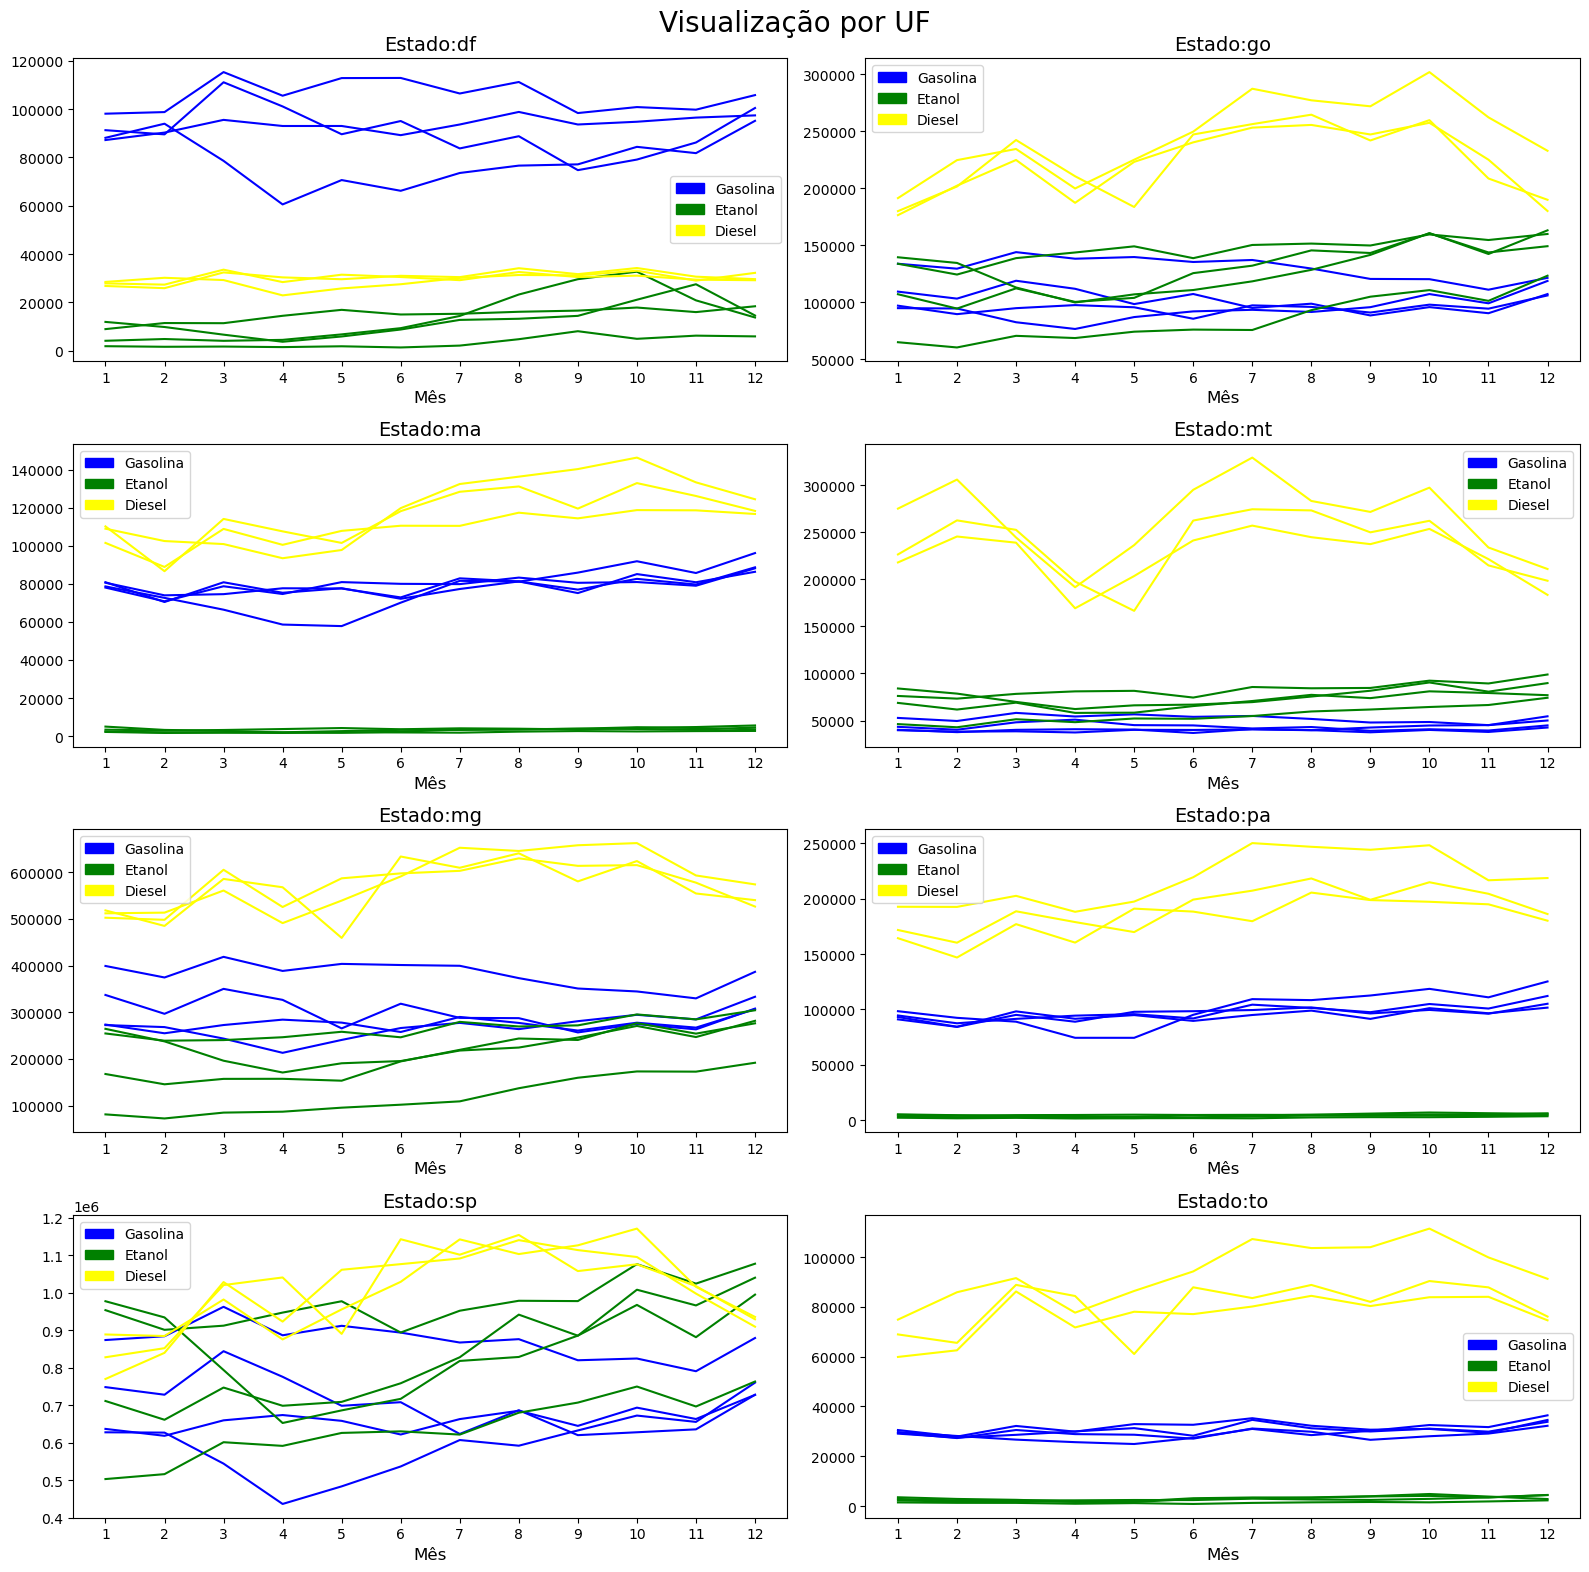

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,16))

k = -1
for i in range(4):
    for j in range(2):
        k += 1
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'gasolina')].loc["2020-01-01":"2020-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='blue')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'gasolina')].loc["2019-01-01":"2019-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='blue')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'gasolina')].loc["2018-01-01":"2018-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='blue')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'gasolina')].loc["2017-01-01":"2017-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='blue')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'etanol')].loc["2020-01-01":"2020-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='green')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'etanol')].loc["2019-01-01":"2019-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='green')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'etanol')].loc["2018-01-01":"2018-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='green')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'etanol')].loc["2017-01-01":"2017-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='green')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'diesel')].loc["2020-01-01":"2020-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='yellow')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'siesel')].loc["2019-01-01":"2019-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='yellow')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'diesel')].loc["2018-01-01":"2018-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='yellow')
        (combustiveis[(combustiveis["regiao"] == estados[k]) & (combustiveis["product"] == 'diesel')].loc["2017-01-01":"2017-12-01"]).plot(x = "meses", y="quantity", ax=ax[i, j], color='yellow')
        ax[i, j].set_title("Estado:" + estados[k], fontsize=14)
        ax[i, j].set_xticks(np.arange(1,13))
        ax[i, j].set_xlabel("Mês", fontsize=12)
        blue_patch = mpatches.Patch(color='blue', label="Gasolina")
        green_patch = mpatches.Patch(color='green', label="Etanol")
        yellow_patch = mpatches.Patch(color='yellow', label="Diesel")
        ax[i, j].legend(handles=[blue_patch, green_patch, yellow_patch])

fig.suptitle("Visualização por UF", fontsize=20)
        
plt.tight_layout();